In [70]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import japanize_matplotlib

%matplotlib inline

# データの用意

In [41]:
#stats from https://www.basketball-reference.com/leagues/NBA_2019_totals.html
#salary from https://hoopshype.com/salaries/players/2019-2020/
# 2019-20のsalary予測のため、2018-19のstatsを使用
dat = pd.read_csv('../data/stats18-19.csv')
sal = pd. read_csv('../data/salary9-20.csv')

In [3]:
dat.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,588,56,157,0.357,...,0.923,5,43,48,20,17,6,14,53,165
1,Quincy Acy,PF,28,PHO,10,0,123,4,18,0.222,...,0.700,3,22,25,8,1,4,4,24,17
2,Jaylen Adams,PG,22,ATL,34,1,428,38,110,0.345,...,0.778,11,49,60,65,14,5,28,45,108
3,Steven Adams,C,25,OKC,80,80,2669,481,809,0.595,...,0.500,391,369,760,124,117,76,135,204,1108
4,Bam Adebayo,C,21,MIA,82,28,1913,280,486,0.576,...,0.735,165,432,597,184,71,65,121,203,729


In [40]:
dat.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

## column names
'Player': Player name  
'Pos': Position  
'Age': Age  
'Tm':Team   
'G': Games  
'GS':Games Started  
'MP':Minutes played   
'FG':Field Goals(2P+3P) 
'FGA': FG Attempts   
'FG%':FG percentage   
'3P':3P FG  
'3PA':3P Attempts  
'3P%': 3P Percentage  
'2P': 2P FG  
'2PA': 2P Attempts  
'2P%': 2P Percentage  
'eFG%': Effective field goal percentage ((2P+(3P*1.5))/FGA)  
'FT': Free throw  
'FTA': Free throw attempts  
'FT%': Free throw percentages   
'ORB': Offensive rebounds  
'DRB':  Deffensive rebounds  
'TRB': Total rebounds   
'AST': Assists  
'STL': Steals   
'BLK': Blocks   
'TOV': Turnovers 
'PF': Personal Fouls 
'PTS': Points 

In [4]:
sal.head()

,name,salary,salary(fix)
0,Stephen Curry,"$40,231,758","$40,491,547"
1,Chris Paul,"$38,506,482","$38,755,131"
2,Russell Westbrook,"$38,506,482","$38,755,131"
3,John Wall,"$38,199,000","$38,445,663"
4,James Harden,"$38,199,000","$38,445,663"


In [5]:
sal['salary'] = [i.replace('$','').replace(',','')  for i in sal['salary'].values]

In [6]:
sal.columns=['Player', 'salary', 'salary(fix)']

In [7]:
sal.head()

,Player,salary,salary(fix)
0,Stephen Curry,40231758,"$40,491,547"
1,Chris Paul,38506482,"$38,755,131"
2,Russell Westbrook,38506482,"$38,755,131"
3,John Wall,38199000,"$38,445,663"
4,James Harden,38199000,"$38,445,663"


In [8]:
df_merge = pd.merge(sal, dat,how='inner')

In [9]:
df_merge.head()

,Player,salary,salary(fix),Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen Curry,40231758,"$40,491,547",PG,30,GSW,69,69,2331,632,...,0.916,45,324,369,361,92,25,192,166,1881
1,Chris Paul,38506482,"$38,755,131",PG,33,HOU,58,58,1857,302,...,0.862,36,229,265,473,114,18,152,146,906
2,Russell Westbrook,38506482,"$38,755,131",PG,30,OKC,73,73,2630,630,...,0.656,109,698,807,784,142,33,325,245,1675
3,John Wall,38199000,"$38,445,663",PG,28,WAS,32,32,1104,245,...,0.697,15,101,116,279,49,29,121,71,663
4,James Harden,38199000,"$38,445,663",PG,29,HOU,78,78,2867,843,...,0.879,66,452,518,586,158,58,387,244,2818


## 重複の確認

In [52]:
df_merge["Player"][df_merge["Player"].duplicated()]

11     Tobias Harris
12     Tobias Harris
14      Jimmy Butler
15      Jimmy Butler
35       Otto Porter
           ...      
414    Cameron Payne
417     Corey Brewer
418     Corey Brewer
422    Tyler Johnson
423    Tyler Johnson
Name: Player, Length: 98, dtype: object

In [53]:
df_merge.iloc[422:424,:]

,Player,salary,salary(fix),Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
422,Tyler Johnson,183115,"$184,297",PG,26,MIA,44,10,1123,171,...,0.693,19,102,121,112,40,21,63,72,475
423,Tyler Johnson,183115,"$184,297",PG,26,PHO,13,12,406,46,...,0.872,15,37,52,54,14,6,14,25,144


途中で移籍した？ややこしいので今回は省く。

In [56]:
df_merge = df_merge[~df_merge["Player"].duplicated()]

In [60]:
df_category = df_merge[['Player','Pos','Tm']]

In [61]:
df_numerical = df_merge.drop(columns=['Player','Pos','Tm','salary(fix)'])

In [62]:
df_numerical.head()

,salary,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,40231758,30,69,69,2331,632,1340,0.472,354,810,...,0.916,45,324,369,361,92,25,192,166,1881
1,38506482,33,58,58,1857,302,720,0.419,127,355,...,0.862,36,229,265,473,114,18,152,146,906
2,38506482,30,73,73,2630,630,1473,0.428,119,411,...,0.656,109,698,807,784,142,33,325,245,1675
3,38199000,28,32,32,1104,245,552,0.444,51,169,...,0.697,15,101,116,279,49,29,121,71,663
4,38199000,29,78,78,2867,843,1909,0.442,378,1028,...,0.879,66,452,518,586,158,58,387,244,2818


In [63]:
df_numerical = df_numerical.astype("float")

# salaryとの相関

In [64]:
salary_corr = pd.DataFrame(df_numerical,columns=df_numerical.columns).corr().iloc[0,:]

<AxesSubplot:>

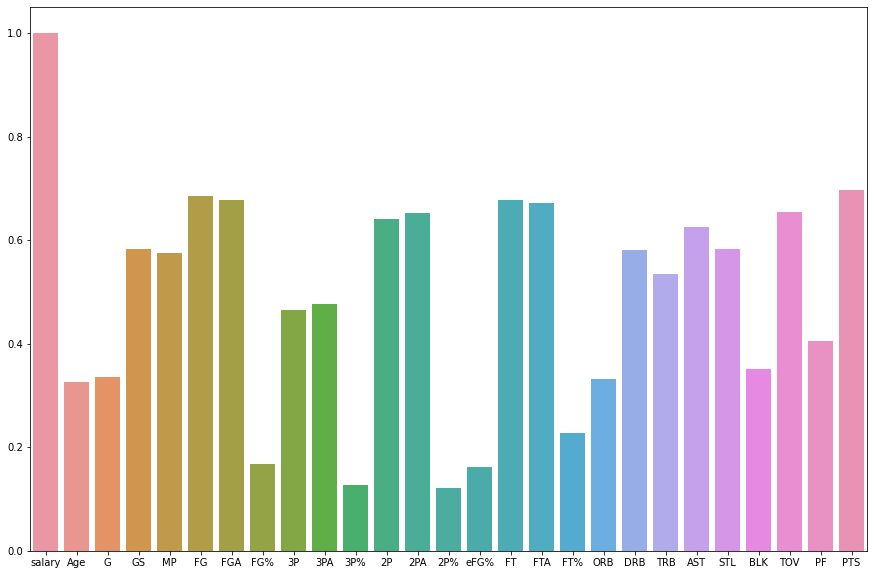

In [65]:
plt.figure(figsize=(15,10))
sns.barplot(x=salary_corr.index,y=salary_corr.values, )

## 考察
Ageとはあまり相関がない。PTS(Points)など得点に関わる変数との相関がある程度高い。  
3P関係が比較的低いが、3Pをしないポジションが存在するためと考えられる。  
Block、ORBもそうかもしれない。  
PFと正の相関があるが、これはゲームに出場するほどPFも増えることによる疑似相関ではないか。  
従って、プレイ時間あたりまたはゲーム数あたりで見てやれば変わるかもしれない。

# ポジションごとに見る

In [67]:
df_category.groupby('Pos').count()

,Player,Tm
Pos,,
C,64,64
C-PF,1,1
PF,62,62
PF-SF,2,2
PG,69,69
SF,55,55
SF-SG,2,2
SG,81,81
SG-PF,1,1


## Cについて

In [82]:
C_df = df_numerical[df_category['Pos']=='C']
C_df = C_df.dropna(axis=1, how="any")
C_df = C_df.drop(columns=["G","GS","FG%","2P%","eFG%","FT%"])
salary_corr_C = pd.DataFrame(C_df,columns=C_df.columns).corr().iloc[0,:]

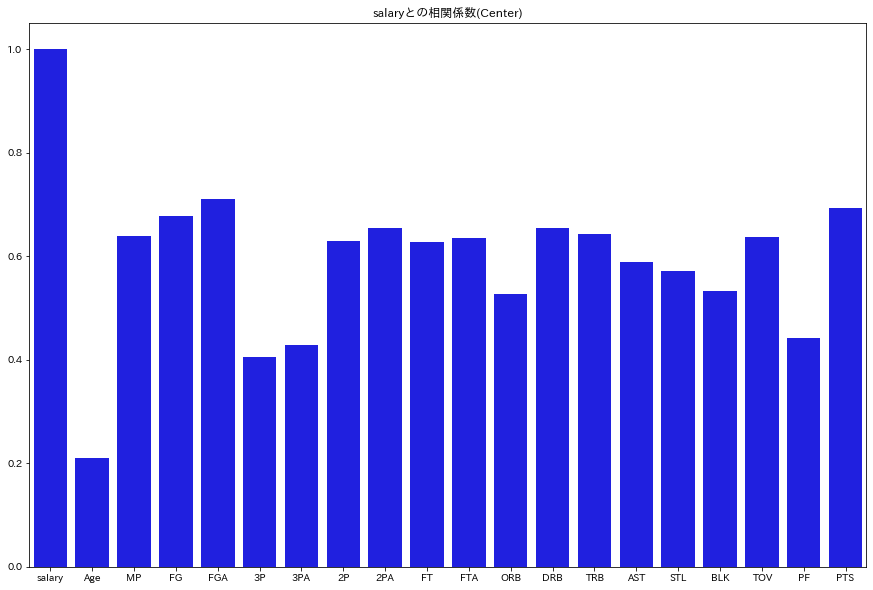

In [83]:
plt.figure(figsize=(15,10))
plt.title("salaryとの相関係数(Center)")
sns.barplot(x=salary_corr_C.index,y=salary_corr_C.values,color='blue')
plt.show()

ORBが少し相関係数が上がった

## PGについて

In [76]:
PG_df = df_numerical[df_category['Pos']=='PG']
PG_df = PG_df.dropna(axis=1, how="any")
PG_df = PG_df.drop(columns=["G","GS"])
salary_corr_PG = pd.DataFrame(PG_df,columns=PG_df.columns).corr().iloc[0,:]

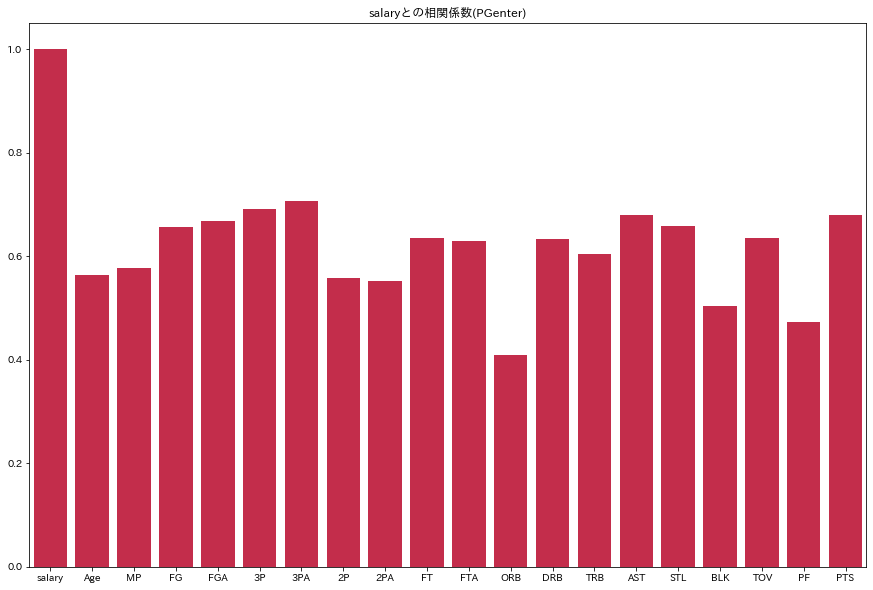

In [81]:
plt.figure(figsize=(15,10))
plt.title("salaryとの相関係数(PGenter)")
sns.barplot(x=salary_corr_PG.index,y=salary_corr_PG.values,color='crimson')
plt.show()

3Pとの相関が最も高い

## 考察
ポジションごとにsalaryと相関の高い変数は変わる。つまり、ポジションごとに分けて分析をするべき。  
また、基本的にゲームによく出る選手=ポイント総獲得料が高い=高salaryと考えられる 。   
従って、あまり試合に出てないのにsaralyが高い選手などをピックアップして見てみると面白いかも。    
または、総量ではなく、試合単位またはプレイ時間単位で変数をスケールすべきか。  